##### Algorithms and Data Structures (Winter - Spring 2022)


* [Table of Contents](ADS_TOC.ipynb)
* <a href="https://colab.research.google.com/github/4dsolutions/elite_school/blob/master/ADS_sandbox_2.ipynb"><img align="left" src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open in Colab" title="Open and Execute in Google Colaboratory"></a>
* [![nbviewer](https://raw.githubusercontent.com/jupyter/design/master/logos/Badges/nbviewer_badge.svg)](https://nbviewer.org/github/4dsolutions/elite_school/blob/master/ADS_sandbox_2.ipynb)
    
## Finite Groups:  Totatives of N Modulo N



### Practice with Numpy and pandas

In [1]:
from IPython.display import YouTubeVideo

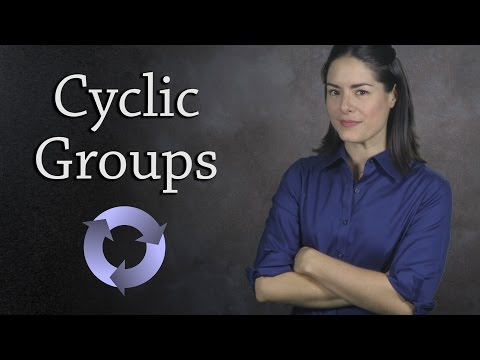

In [2]:
YouTubeVideo("8A84sA1YuPw")

In [3]:
import numpy as np
import pandas as pd
from itertools import product
from math import gcd
from primes import invmod

In [4]:
class Mod:
    
    _modulus = 12
    
    def __init__(self, n):
        self.value = n % self._modulus
        
    def __eq__(self, other):
        return self.value == other.value % self._modulus
    
    def __repr__(self):
        return "({} mod {})".format(self.value, self._modulus)

    def __str__(self):
        return "{}".format(self.value)
    
    def __add__(self, other):
        return type(self)(self.value + other.value)
    
    def __mul__(self, other):
        return type(self)(self.value * other.value)
    
    def __invert__(self):
        return type(self)(invmod(self.value, self._modulus))
    
    def __pow__(self, n):
        base = self.value
        if n < 0:
            base = ~self.value
        return type(self)(pow(base, abs(n), self._modulus))
    
    def __hash__(self):
        return self.value 

In [5]:
def test_invmod(k, modulus):
    inv_k = invmod(k, modulus)
    if (inv_k * k) % modulus != 1:
        raise ValueError(f"{k} has no inverse mod {modulus}")
    return inv_k

In [6]:
try:
    test_invmod(4, 12)
except ValueError as e:
    print("oops:", e)

oops: 4 has no inverse mod 12


In [7]:
def totatives(n):
    return [i for i in range(1, n) if gcd(i, n) == 1]

def totient(n):
    return len(totatives(n))

In [8]:
def make_mods(n):
    return [Mod(t) for t in totatives(n)]

In [9]:
? product

Init signature:  product(self, /, *args, **kwargs)
Docstring:     
product(*iterables, repeat=1) --> product object

Cartesian product of input iterables.  Equivalent to nested for-loops.

For example, product(A, B) returns the same as:  ((x,y) for x in A for y in B).
The leftmost iterators are in the outermost for-loop, so the output tuples
cycle in a manner similar to an odometer (with the rightmost element changing
on every iteration).

To compute the product of an iterable with itself, specify the number
of repetitions with the optional repeat keyword argument. For example,
product(A, repeat=4) means the same as product(A, A, A, A).

product('ab', range(3)) --> ('a',0) ('a',1) ('a',2) ('b',0) ('b',1) ('b',2)
product((0,1), (0,1), (0,1)) --> (0,0,0) (0,0,1) (0,1,0) (0,1,1) (1,0,0) ...
Type:           type
Subclasses:     


In [10]:
the_list = make_mods(12)
the_list

[(1 mod 12), (5 mod 12), (7 mod 12), (11 mod 12)]

In [11]:
products = product(the_list, the_list) # makes an iterator

In [12]:
list(products)  # exhausts the iterator

[((1 mod 12), (1 mod 12)),
 ((1 mod 12), (5 mod 12)),
 ((1 mod 12), (7 mod 12)),
 ((1 mod 12), (11 mod 12)),
 ((5 mod 12), (1 mod 12)),
 ((5 mod 12), (5 mod 12)),
 ((5 mod 12), (7 mod 12)),
 ((5 mod 12), (11 mod 12)),
 ((7 mod 12), (1 mod 12)),
 ((7 mod 12), (5 mod 12)),
 ((7 mod 12), (7 mod 12)),
 ((7 mod 12), (11 mod 12)),
 ((11 mod 12), (1 mod 12)),
 ((11 mod 12), (5 mod 12)),
 ((11 mod 12), (7 mod 12)),
 ((11 mod 12), (11 mod 12))]

In [13]:
def make_table(n):
    # make all the products of totatives of n mod n
    Mod._modulus = n
    the_list = make_mods(n)
    tot = totient(n)
    products = product(the_list, the_list)  # remake the iterator
    table = np.reshape(np.array([a*b for a,b in list(products)]), (tot, tot))
    return table

In [14]:
the_table = make_table(12)

In [15]:
the_table

array([[(1 mod 12), (5 mod 12), (7 mod 12), (11 mod 12)],
       [(5 mod 12), (1 mod 12), (11 mod 12), (7 mod 12)],
       [(7 mod 12), (11 mod 12), (1 mod 12), (5 mod 12)],
       [(11 mod 12), (7 mod 12), (5 mod 12), (1 mod 12)]], dtype=object)

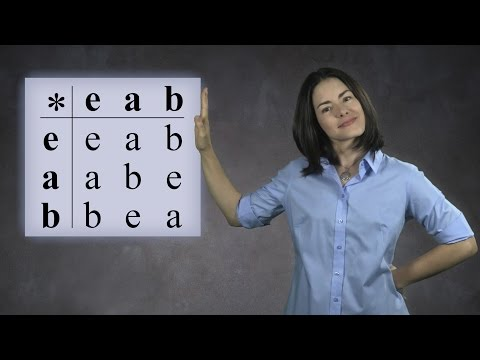

In [16]:
YouTubeVideo("BwHspSCXFNM")

In [17]:
def make_cayley(n):
    num_table = make_table(n)
    caley_table = pd.DataFrame(num_table)
    columns = num_table[0,:]
    rows = num_table[:,0]
    caley_table.index = rows
    caley_table.columns = columns
    return caley_table

In [18]:
t = make_cayley(12)

In [19]:
t

,1,5,7,11
1,1,5,7,11
5,5,1,11,7
7,7,11,1,5
11,11,7,5,1


In [20]:
t.iloc[0,0]

(1 mod 12)

In [21]:
the_array = t.to_numpy()

In [22]:
the_array[0,:]

array([(1 mod 12), (5 mod 12), (7 mod 12), (11 mod 12)], dtype=object)

In [23]:
def make_pow_table(n):
    # make all the powers
    Mod._modulus = n
    the_list = make_mods(n)
    tot = totient(n)
    products = product(the_list, range(n))  # remake the iterator
    table = np.reshape(np.array([a**n for a,n in list(products)]), (tot, n))
    return table

def make_pow_frame(n):
    the_table = make_pow_table(n)
    columns = np.arange(n)
    rows = make_mods(n)
    pow_table = pd.DataFrame(the_table)
    pow_table.index = rows
    pow_table.columns = columns
    pow_table.index.name = "Totatives"
    pow_table.columns.name = "Powers"
    return pow_table

In [24]:
t = make_pow_frame(12)
t

Powers,0,1,2,3,4,5,6,7,8,9,10,11
Totatives,,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,1,1,1
5,1,5,1,5,1,5,1,5,1,5,1,5
7,1,7,1,7,1,7,1,7,1,7,1,7
11,1,11,1,11,1,11,1,11,1,11,1,11


In [25]:
t = make_pow_frame(13)
t

Powers,0,1,2,3,4,5,6,7,8,9,10,11,12
Totatives,,,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,1,2,4,8,3,6,12,11,9,5,10,7,1
3,1,3,9,1,3,9,1,3,9,1,3,9,1
4,1,4,3,12,9,10,1,4,3,12,9,10,1
5,1,5,12,8,1,5,12,8,1,5,12,8,1
6,1,6,10,8,9,2,12,7,3,5,4,11,1
7,1,7,10,5,9,11,12,6,3,8,4,2,1
8,1,8,12,5,1,8,12,5,1,8,12,5,1
9,1,9,3,1,9,3,1,9,3,1,9,3,1


In [26]:
t = make_pow_frame(18)
t

Powers,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17
Totatives,,,,,,,,,,,,,,,,,,
1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
5,1,5,7,17,13,11,1,5,7,17,13,11,1,5,7,17,13,11
7,1,7,13,1,7,13,1,7,13,1,7,13,1,7,13,1,7,13
11,1,11,13,17,7,5,1,11,13,17,7,5,1,11,13,17,7,5
13,1,13,7,1,13,7,1,13,7,1,13,7,1,13,7,1,13,7
17,1,17,1,17,1,17,1,17,1,17,1,17,1,17,1,17,1,17


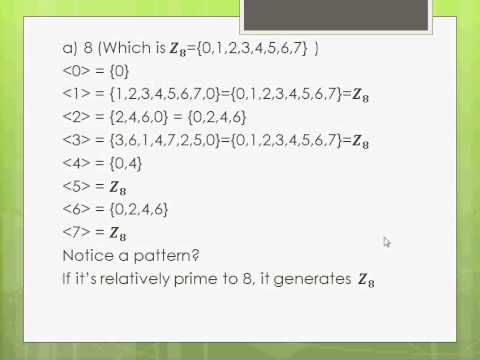

In [27]:
YouTubeVideo("uwUVKwC6E_0")

Exhibit:  From an archeological layer when Adobe Flash still worked.  [Vegetable Group Soup](http://4dsolutions.net/ocn/flash/group.html)